### <font color = maroon> 1. Importing required libraries </font>

In [66]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

In [67]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# <font color = blue> EDA Case Study </font>

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

### <font color = maroon> 2. Reading and cleaning the data from Application Data</font>

In [68]:
# reading data from csv for both previous application & current application data

prevApp_df =pd.read_csv('previous_application.csv')
appData_df =pd.read_csv('application_data.csv')

#### <font color = maroon> 2.1 Checking structure of application_data </font>

In [69]:
# checking for the shape/ row & columns in current application

appData_df.shape

(307511, 122)

In [70]:
# checking for the description of dataframe for all numeric values

appData_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [71]:
# checking for null values in all columns

appData_df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

#### <font color = maroon> 2.2 Dropping unwanted columns</font>

Dropping columns having null data more than or equal to 35%, we increased this from earlier planned 30% as one of the column OCCUPATION_TYPE was having around 31% null values which is very important for this analysis

In [72]:
# fetching the columns having null values greater than or equal 35%

colWithHighNullValues = (appData_df.isnull().sum()/len(appData_df))
colWithHighNullValues = list(colWithHighNullValues[colWithHighNullValues.values>=0.35].index)
appData_df.drop(labels = colWithHighNullValues,axis =1,inplace=True) 

In [73]:
# rechecking the shape of dataframe if columns have reduced
appData_df.shape

(307511, 73)

Dropping columns related to "FLAG_" and "EXT_"

In [74]:
# dropping columns starting with FLAG_ and EXT_ as they are not needed for further analysis

column_list=[]
for i in appData_df.columns:
    if not ((i.startswith('FLAG_')) | (i.startswith('EXT_'))):
        column_list.append(i)
        
        
appData_df = appData_df.loc[:, column_list]

In [75]:
# rechecking the shape of dataframe

appData_df.shape

(307511, 43)

In [76]:
# getting info of the dataframe 

appData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307499 non-null  float64
 8   AMT_GOODS_PRICE              307233 non-null  float64
 9   NAME_TYPE_SUITE              306219 non-null  object 
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

In [77]:
# having a check again on the columns having null values

appData_df.isnull().sum().sort_values(ascending = False)

OCCUPATION_TYPE                96391
AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_HOUR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
NAME_TYPE_SUITE                 1292
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
NAME_FAMILY_STATUS                 0
NAME_EDUCATION_TYPE                0
NAME_INCOME_TYPE                   0
CODE_GENDER                        0
AMT_CREDIT                         0
AMT_INCOME_TOTAL                   0
CNT_CHILDREN                       0
REGION_POPULATION_RELATIVE         0
NAME_CONTRACT_TYPE                 0
TARGET                             0
NAME_HOUSING_TYPE                  0
R

#### <font color = maroon> 2.3 Further Imputation and cleaning of columns</font>

Based on the null value count, here is the plan we are following 

In [78]:
#OCCUPATION_TYPE                96391 --> replace with value "Unknown"
#AMT_REQ_CREDIT_BUREAU_YEAR     41519 --> drop 
#AMT_REQ_CREDIT_BUREAU_MON      41519 --> drop
#AMT_REQ_CREDIT_BUREAU_WEEK     41519 --> drop
#AMT_REQ_CREDIT_BUREAU_DAY      41519 --> drop
#AMT_REQ_CREDIT_BUREAU_HOUR     41519 --> drop
#AMT_REQ_CREDIT_BUREAU_QRT      41519 --> drop
#NAME_TYPE_SUITE                 1292 --> replace with mode Unaccompanied      
#OBS_30_CNT_SOCIAL_CIRCLE        1021 --> leave like that
#DEF_30_CNT_SOCIAL_CIRCLE        1021 --> leave like that
#OBS_60_CNT_SOCIAL_CIRCLE        1021 --> leave like that
#DEF_60_CNT_SOCIAL_CIRCLE        1021 --> leave like that
#AMT_GOODS_PRICE                  278 --> replace with median
#AMT_ANNUITY                       12 --> replace with median
#CNT_FAM_MEMBERS                    2 --> replace with mode
#DAYS_LAST_PHONE_CHANGE             1 --> replace with median

In [79]:
# replacing all null values in "Occupation Type" with "Unknown"

appData_df["OCCUPATION_TYPE"].fillna("Unknown", inplace=True)


In [80]:
appData_df.isnull().sum().sort_values(ascending = False)

AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_HOUR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
NAME_TYPE_SUITE                 1292
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
NAME_HOUSING_TYPE                  0
NAME_FAMILY_STATUS                 0
NAME_EDUCATION_TYPE                0
NAME_INCOME_TYPE                   0
CODE_GENDER                        0
AMT_CREDIT                         0
AMT_INCOME_TOTAL                   0
CNT_CHILDREN                       0
DAYS_BIRTH                         0
NAME_CONTRACT_TYPE                 0
TARGET                             0
REGION_POPULATION_RELATIVE         0
R

Dropping columns having null data more than or equal to 10%, this we targeted to remove below columns as we believe for 
further analysis below data is no more required


In [81]:
#AMT_REQ_CREDIT_BUREAU_MON      41519
#AMT_REQ_CREDIT_BUREAU_WEEK     41519
#AMT_REQ_CREDIT_BUREAU_DAY      41519
#AMT_REQ_CREDIT_BUREAU_HOUR     41519
#AMT_REQ_CREDIT_BUREAU_QRT      41519

colWithHighNullValues = (appData_df.isnull().sum()/len(appData_df))
colWithHighNullValues = list(colWithHighNullValues[colWithHighNullValues.values>=0.1].index)
appData_df.drop(labels = colWithHighNullValues,axis =1,inplace=True) 

In [82]:
# checking the shape of data 

appData_df.shape

(307511, 37)

In [83]:
# imputations done on other null values present application data

appData_df["AMT_ANNUITY"].fillna(appData_df["AMT_ANNUITY"].median(), inplace=True)
appData_df["AMT_GOODS_PRICE"].fillna(appData_df["AMT_GOODS_PRICE"].median(), inplace=True)
appData_df["CNT_FAM_MEMBERS"].fillna(appData_df["CNT_FAM_MEMBERS"].mode()[0], inplace=True)
appData_df["DAYS_LAST_PHONE_CHANGE"].fillna(appData_df["DAYS_LAST_PHONE_CHANGE"].mean(), inplace=True)
appData_df["NAME_TYPE_SUITE"].fillna(appData_df["NAME_TYPE_SUITE"].mode()[0], inplace=True)

In [84]:
appData_df.isnull().sum().sort_values(ascending = False)

OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
DAYS_LAST_PHONE_CHANGE            0
AMT_GOODS_PRICE                   0
NAME_HOUSING_TYPE                 0
NAME_FAMILY_STATUS                0
NAME_EDUCATION_TYPE               0
NAME_INCOME_TYPE                  0
NAME_TYPE_SUITE                   0
AMT_CREDIT                        0
AMT_ANNUITY                       0
DAYS_BIRTH                        0
AMT_INCOME_TOTAL                  0
CNT_CHILDREN                      0
CODE_GENDER                       0
NAME_CONTRACT_TYPE                0
TARGET                            0
REGION_POPULATION_RELATIVE        0
DAYS_ID_PUBLISH                   0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
OCCUPATION_TYPE                   0
CNT_FAM_MEMBERS                   0
REGION_RATING_CLIENT              0
REGION_RATING_CLIENT_W_CITY       0
WEEKDAY_APPR_PROCESS_START  

In [85]:
appData_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,306490.000000,306490.000000,306490.000000,306490.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,-16036.995067,63815.045904,...,0.050769,0.040659,0.078173,0.230454,0.179555,1.422245,0.143421,1.405292,0.100049,-962.858788
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,141275.766519,...,0.219526,0.197499,0.268444,0.421124,0.383817,2.400989,0.446698,2.379803,0.362291,826.807143
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1570.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-757.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,-274.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,348.000000,34.000000,344.000000,24.000000,0.000000


In [86]:
# CODE_GENDER & ORGANIZATION_TYPE value XNA to be replace with mode value from their respective columns

appData_df.loc[appData_df.CODE_GENDER == 'XNA','CODE_GENDER'] = appData_df.CODE_GENDER.mode()[0]
appData_df.loc[appData_df.ORGANIZATION_TYPE == 'XNA','ORGANIZATION_TYPE'] = appData_df.ORGANIZATION_TYPE.mode()[0]

In [87]:
# all negative values for DAY_* columns to be replaced with abs() values for easier analysis
column_list=[]
for i in appData_df.columns:
    if  i.startswith('DAYS_'):
        column_list.append(i)
        
        
appData_df[column_list]= abs(appData_df[column_list])

In [88]:
# Calculating Age of Applicants, by creating a new column "Age"

appData_df["Age"] = (appData_df["DAYS_BIRTH"] / 365).astype(int)

In [89]:
# printing information of all columns 

appData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307511 non-null  float64
 8   AMT_GOODS_PRICE              307511 non-null  float64
 9   NAME_TYPE_SUITE              307511 non-null  object 
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

#### <font color = maroon> 2.4 Checking for outliers </font>

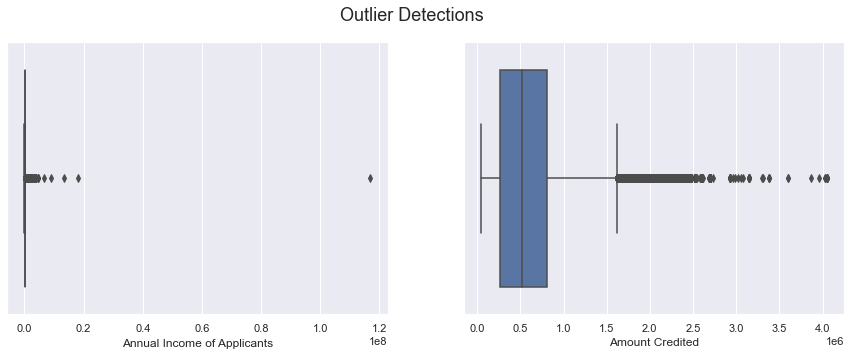

In [90]:
#depucting some of the columns withoutliers in the application data

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Outlier Detections', fontsize=18)


amt_annual_income= sns.boxplot(appData_df['AMT_INCOME_TOTAL'], ax=axes[0])
amt_annual_income.set_xlabel('Annual Income of Applicants',fontsize= 12)

amt_credit= sns.boxplot(appData_df['AMT_CREDIT'], ax=axes[1])
amt_credit.set_xlabel('Amount Credited',fontsize= 12)


plt.show()

For "AMT_INCOME_TOTAL" column it can be seen that the IQR is itself not visible and a value is way higher. What we see in here are only the whisker values
Also for 'AMT_CREDIT' can be seen that Upper Fence has lot many values which determines it has outliers



#### <font color = maroon> 2.5 Checking distributions of values for all non-numeric columns </font>

In [91]:
def checkDistributionsFor(param):
    plt.figure(figsize=(14, 10))
    plt.title('Distribution of Applicants in terms of their ' + param, fontsize=18)
    occType = appData_df[param].value_counts().sort_values(ascending=True)
    occType.plot(kind='barh', x= param, y = "Count" )
    plt.show()
    

##### <font color = brown> 2.5.1 Distribution of Applicants in terms of their Occuption - Type</font>

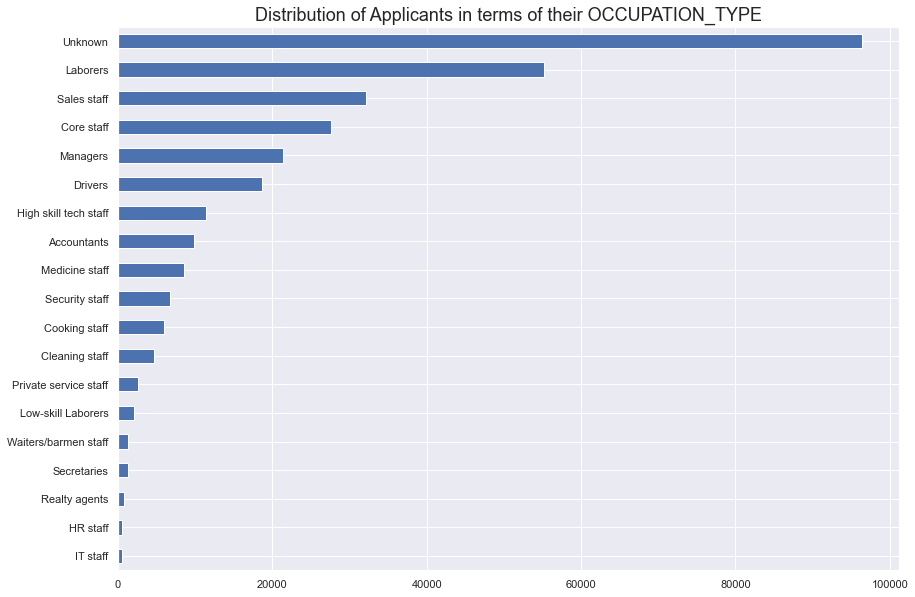

In [92]:
checkDistributionsFor('OCCUPATION_TYPE')

##### <font color = brown> 2.5.2 Distribution of DAYS when Applicant had started Previous Application</font>

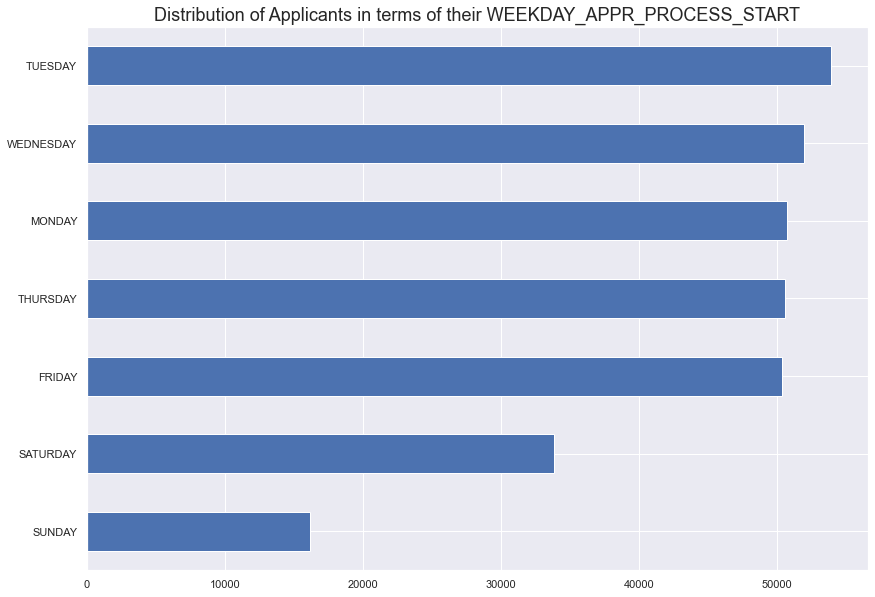

In [93]:
checkDistributionsFor('WEEKDAY_APPR_PROCESS_START')

##### <font color = brown> 2.5.3 Distribution of Applicants Organization Type</font>

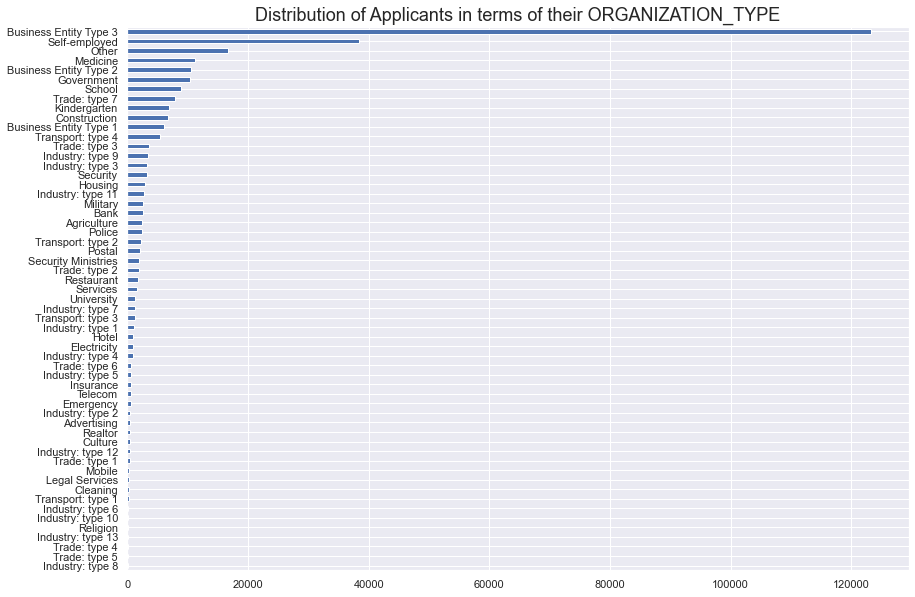

In [94]:
checkDistributionsFor('ORGANIZATION_TYPE')

##### <font color = brown> 2.5.4 Distribution of Applicants companion while coming for application</font>

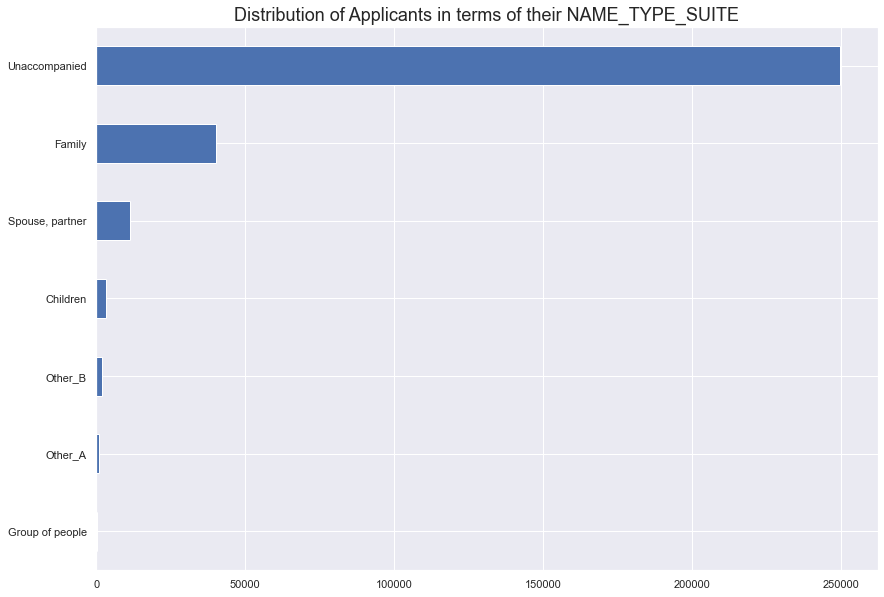

In [95]:
checkDistributionsFor('NAME_TYPE_SUITE')

##### <font color = brown> 2.5.5 Distribution of Applicants INCOME TYPE </font>

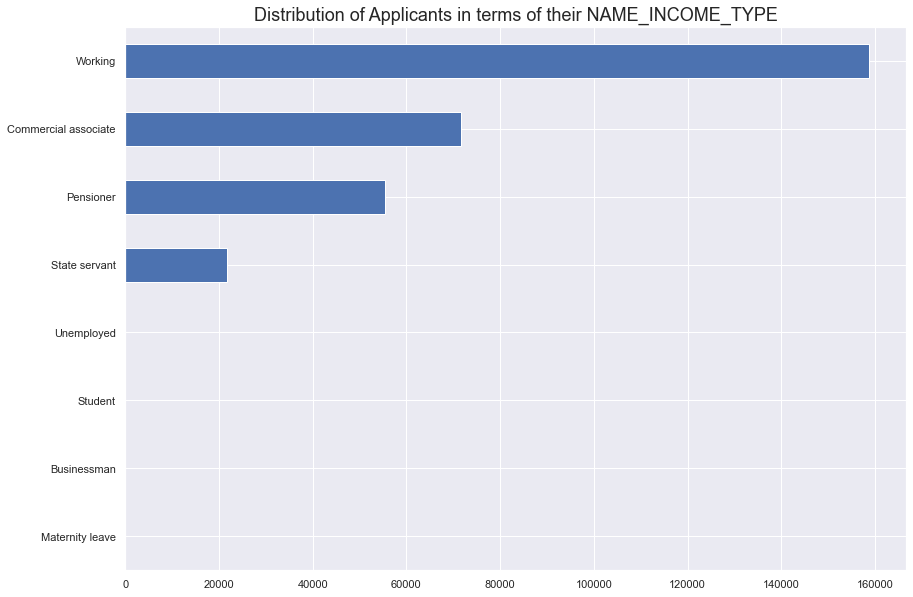

In [96]:
checkDistributionsFor('NAME_INCOME_TYPE')

##### <font color = brown> 2.5.6 Distribution of Applicants Family Status </font>

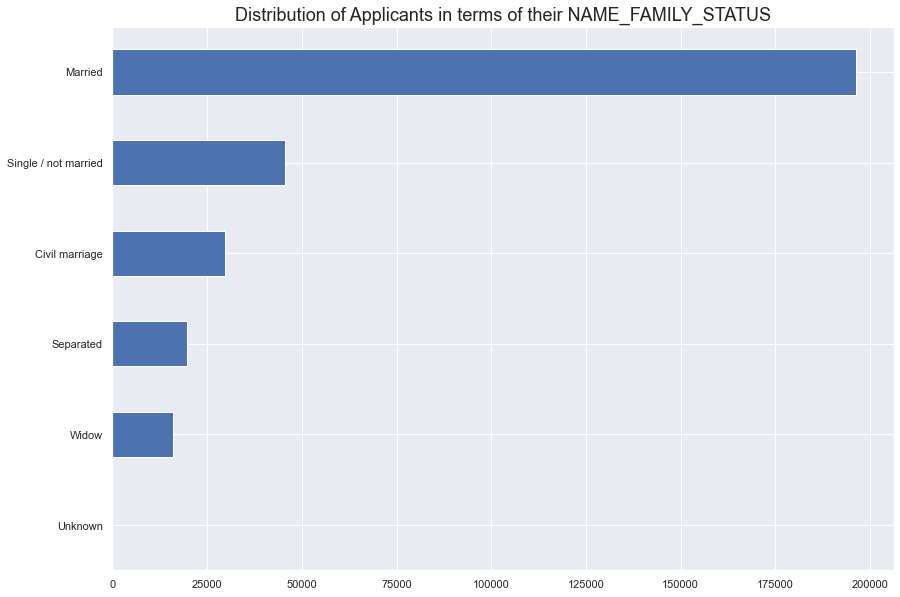

In [97]:
checkDistributionsFor('NAME_FAMILY_STATUS')

##### <font color = brown> 2.5.7 Distribution of Applicants Housing Situation </font>

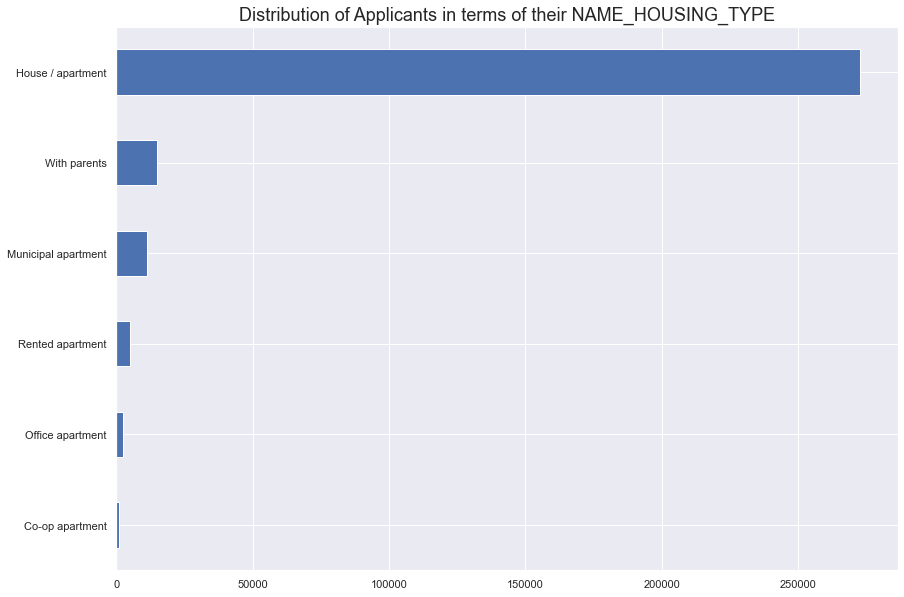

In [98]:
checkDistributionsFor('NAME_HOUSING_TYPE')

##### <font color = brown> 2.5.8 Distribution of Applicants Contract product type </font>

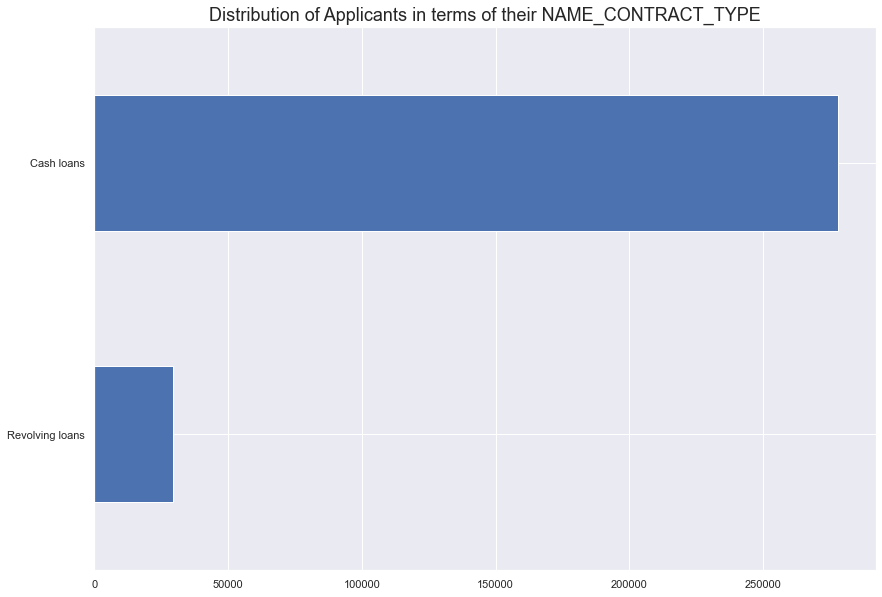

In [99]:
checkDistributionsFor('NAME_CONTRACT_TYPE')

##### <font color = brown> 2.5.9 Distribution of Applicants Gender </font>

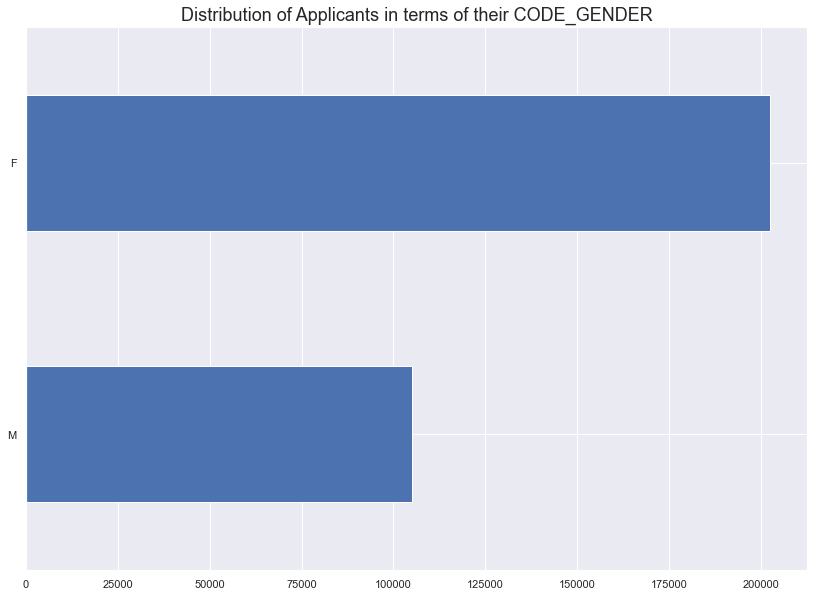

In [100]:
checkDistributionsFor('CODE_GENDER')

#### <font color = maroon> 2.6 Binning Values </font>

In [101]:
# Binning values For Applicants Income & Age as it will infer more meaning insights, 

appData_df['INCOME_GROUP'] = pd.qcut(appData_df.AMT_INCOME_TOTAL, q=[0, 0.2, 0.6, 0.9, 0.99, 1], 
                                      labels=['LOW', 'MIDDLE', 'RICH', 'VERY_RICH', 'ELITE'])

appData_df['Age_Group'] = pd.cut(appData_df.Age, bins=[0,19,39,59,100], 
                                  labels=["Teen", "Young Adults", "Old Adults","Senior Citizens"])



##### <font color = maroon> 2.6.1 Checking for distribution of "Income Group" after binning </font>

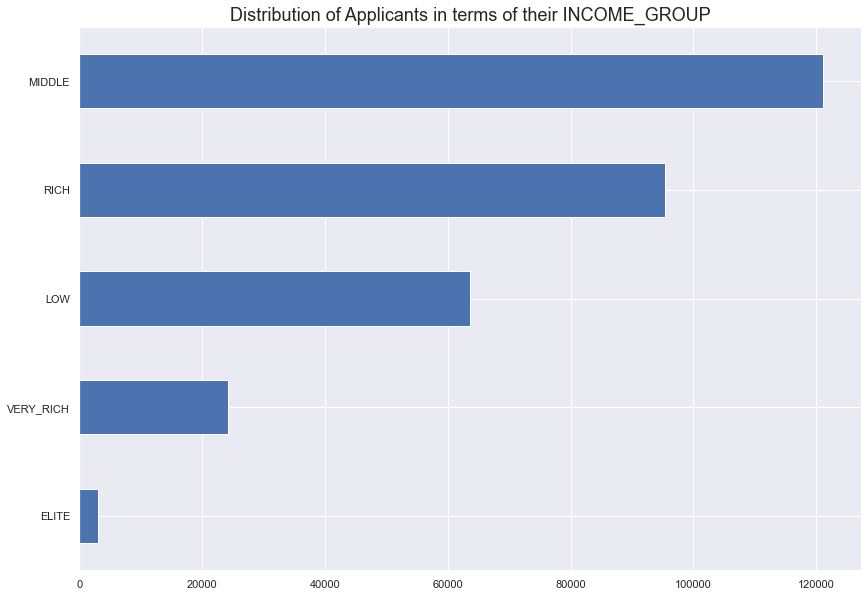

In [102]:
checkDistributionsFor('INCOME_GROUP')

##### <font color = maroon> 2.6.2 Checking for distribution of "Age Group" after binning </font>

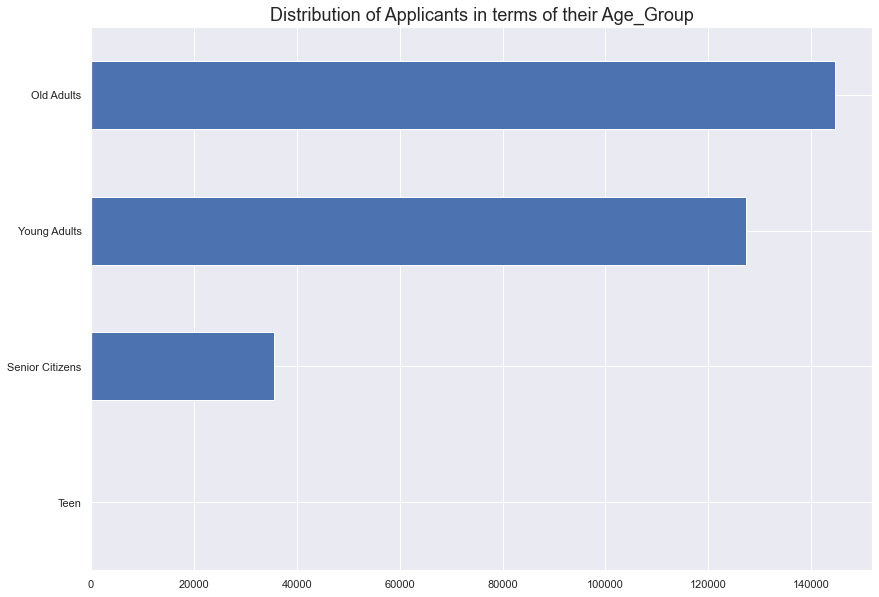

In [103]:
checkDistributionsFor('Age_Group')

#### <font color = maroon> 2.7 Target Imbalance Check </font>

In [104]:
# Having a check of columns with aggregation on 'TARGET' values
appData_df.groupby('TARGET').sum()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,Age
TARGET,,,,,,,,,,,,,,,,,,,,,
0,78655893854,116734,4.779590e+10,1.703602e+11,7.678749e+09,1.534003e+11,5942.256975,4.562037e+09,1.969440e+10,1.421894e+09,...,11447,21100,63347,49712,398816.0,39198.0,394078.0,27237.0,2.760113e+08,12357088
1,6887675594,11514,4.111312e+09,1.384685e+10,6.574093e+08,1.213792e+10,474.917032,3.695159e+08,1.131705e+09,1.113929e+08,...,1056,2939,7520,5503,37088.0,4759.0,36630.0,3427.0,2.007838e+07,999950


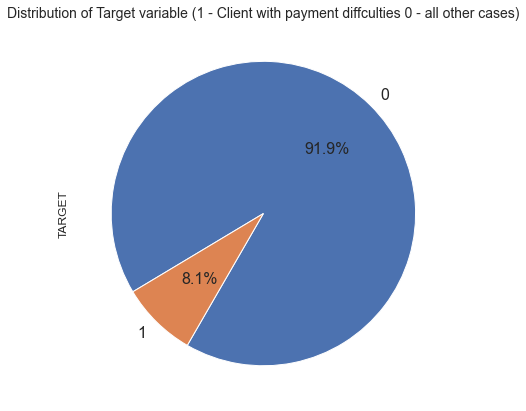

In [105]:
# Target Distribution

plt.figure(figsize=(12, 7))
plt.title("Distribution of Target variable (1 - Client with payment diffculties 0 - all other cases)", fontsize=14);

targetVal = appData_df["TARGET"].value_counts()

targetVal.plot(kind='pie', autopct='%1.1f%%', startangle=240, fontsize=16)
plt.show()

#### <font color = maroon> 2.8 Performing univariate anlysis on Target values </font>

In [106]:
appData_df_0 = appData_df[appData_df["TARGET"]==0]
appData_df_1 = appData_df[appData_df["TARGET"]==1]

In [107]:
# generic method to show univariate analysis againsst TARGET 0 dataset & TARGET 1 dataset

def plotGraph(column):
    sns.set_theme(context='notebook', style='darkgrid')
    plt.figure(figsize=(18,9))
    plt.subplot(1, 2, 1)
    sns.countplot(column, data=appData_df_0)
    plt.title('Distribution for Non-Defaulters', fontsize=14)
    plt.xlabel(column)
    plt.xticks(rotation=90)
    plt.subplot(1, 2, 2)
    sns.countplot(column, data=appData_df_1)
    plt.title('Distribution for Defaulters', fontsize=14)
    plt.xlabel(column)
    plt.xticks(rotation=90)
    plt.show()

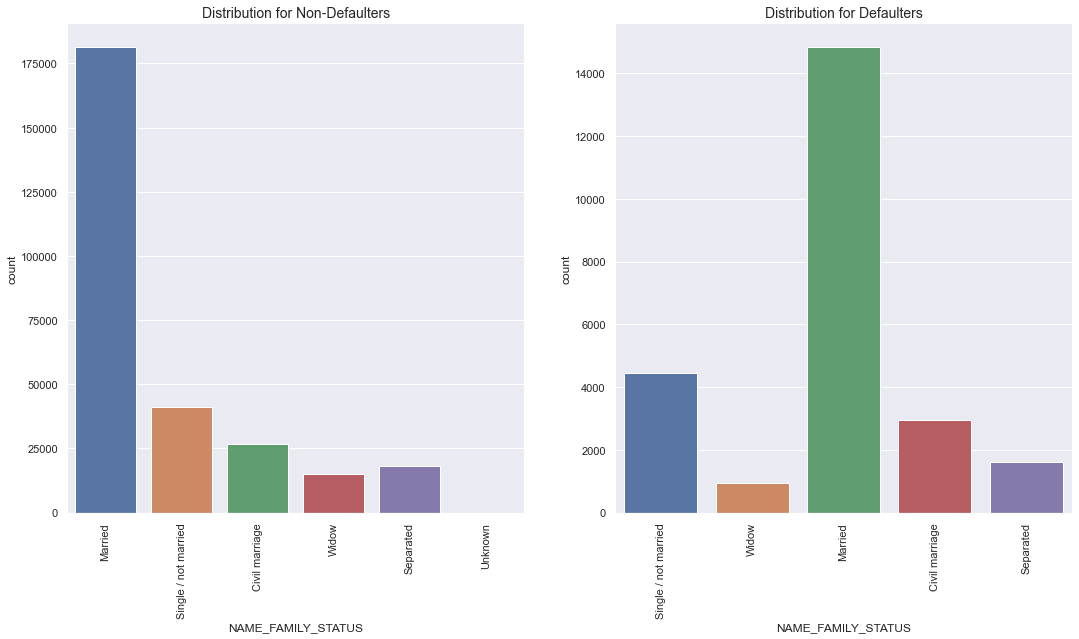

In [108]:
plotGraph('NAME_FAMILY_STATUS')

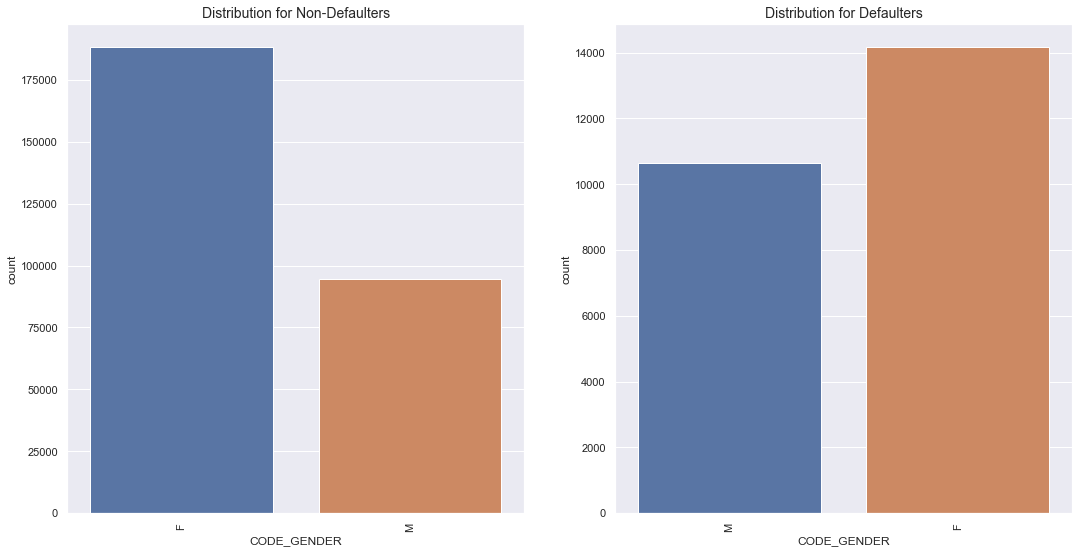

In [109]:
plotGraph('CODE_GENDER')

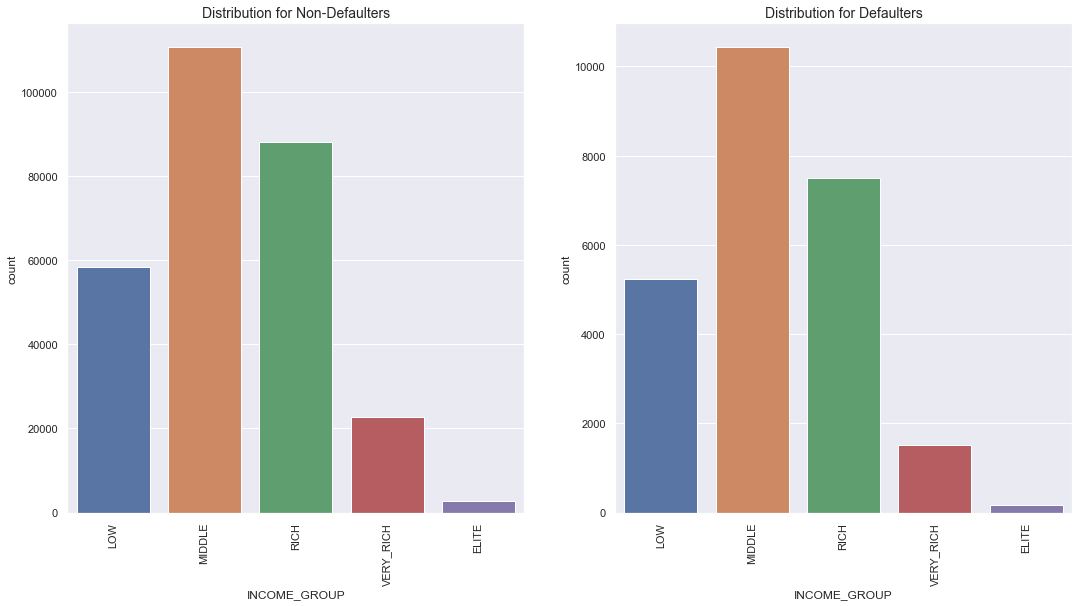

In [110]:
plotGraph('INCOME_GROUP')

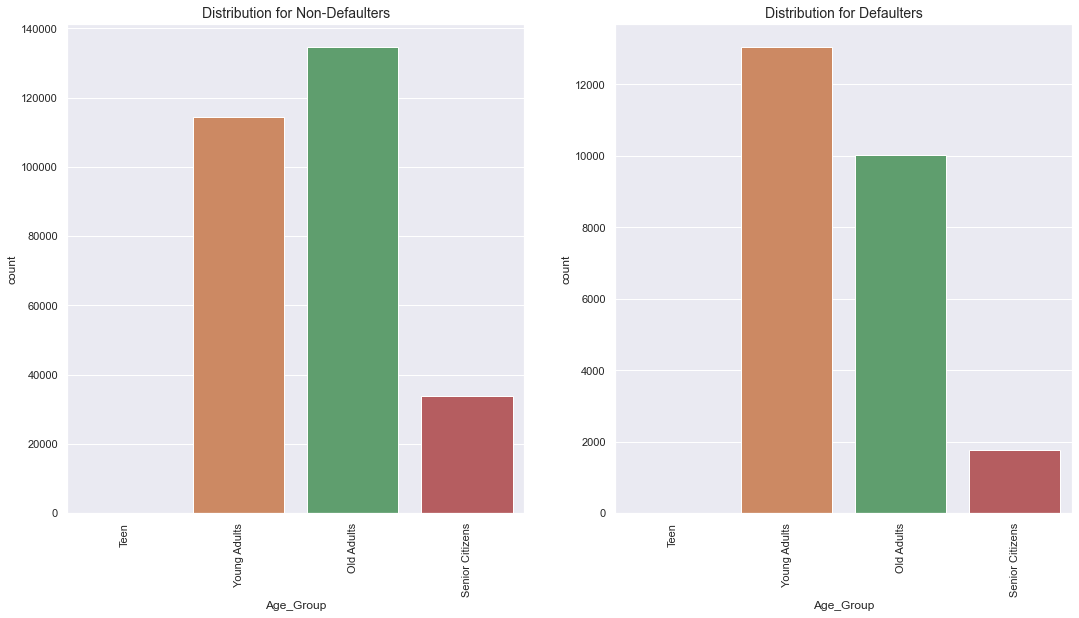

In [111]:
plotGraph('Age_Group')

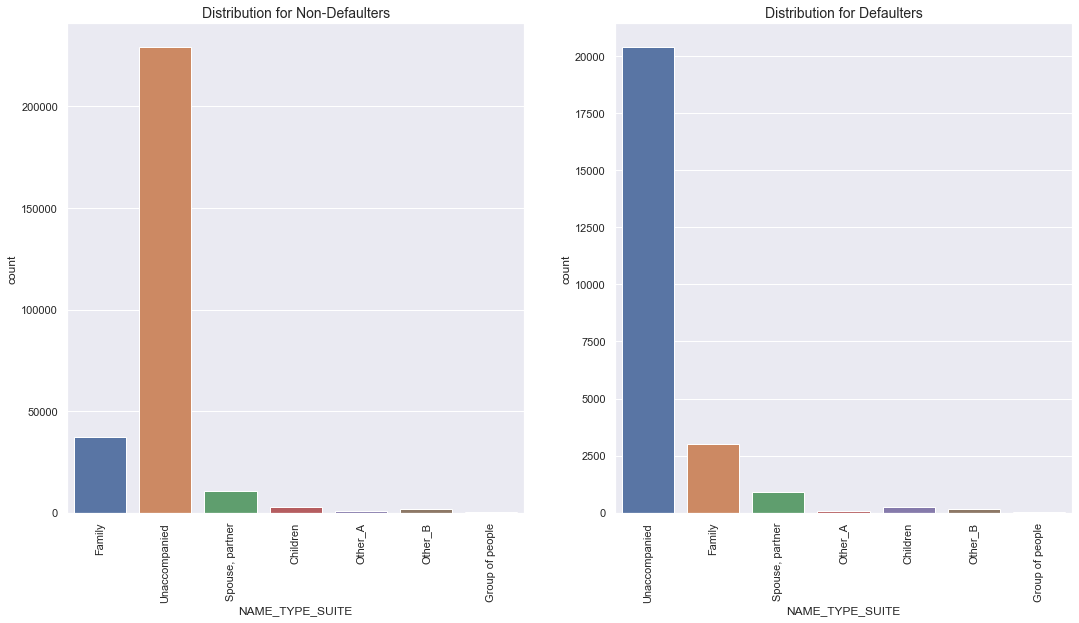

In [112]:
plotGraph('NAME_TYPE_SUITE')

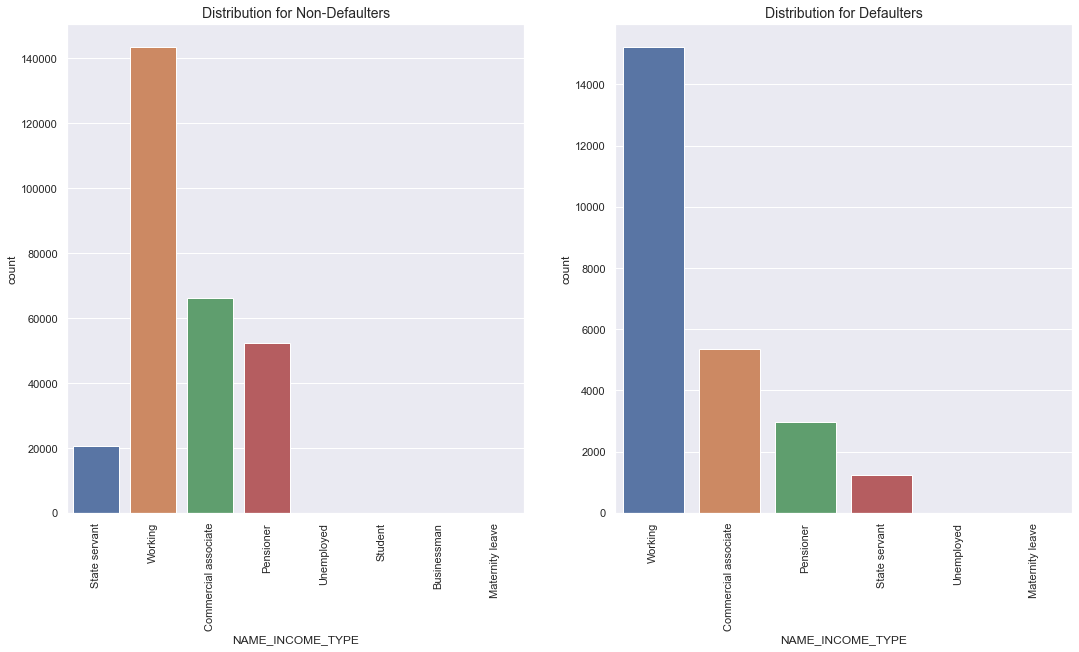

In [113]:
plotGraph('NAME_INCOME_TYPE')

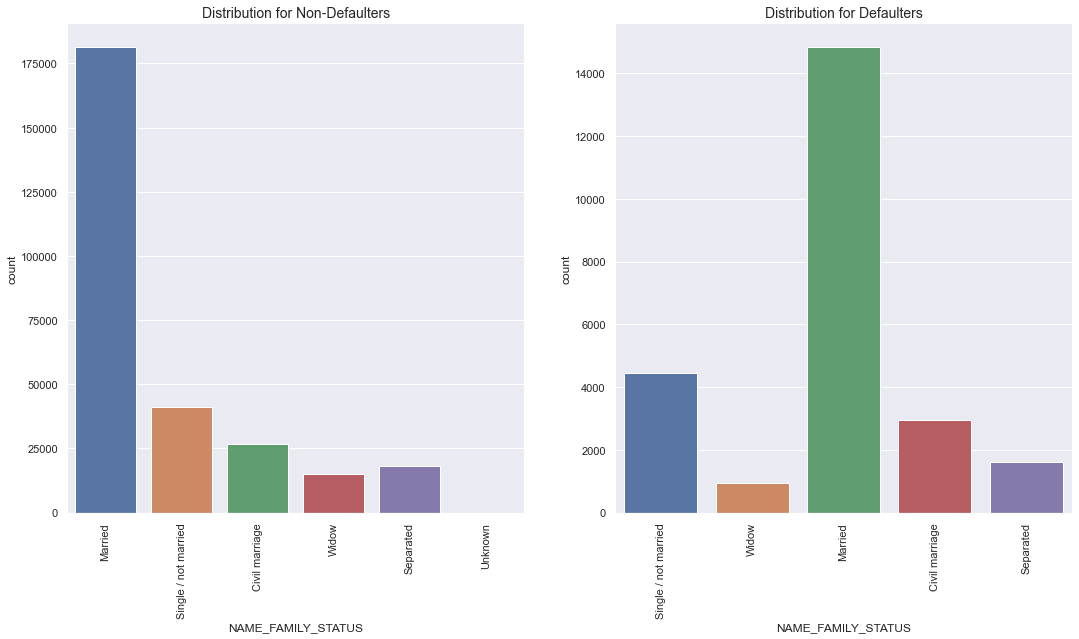

In [114]:
plotGraph('NAME_FAMILY_STATUS')

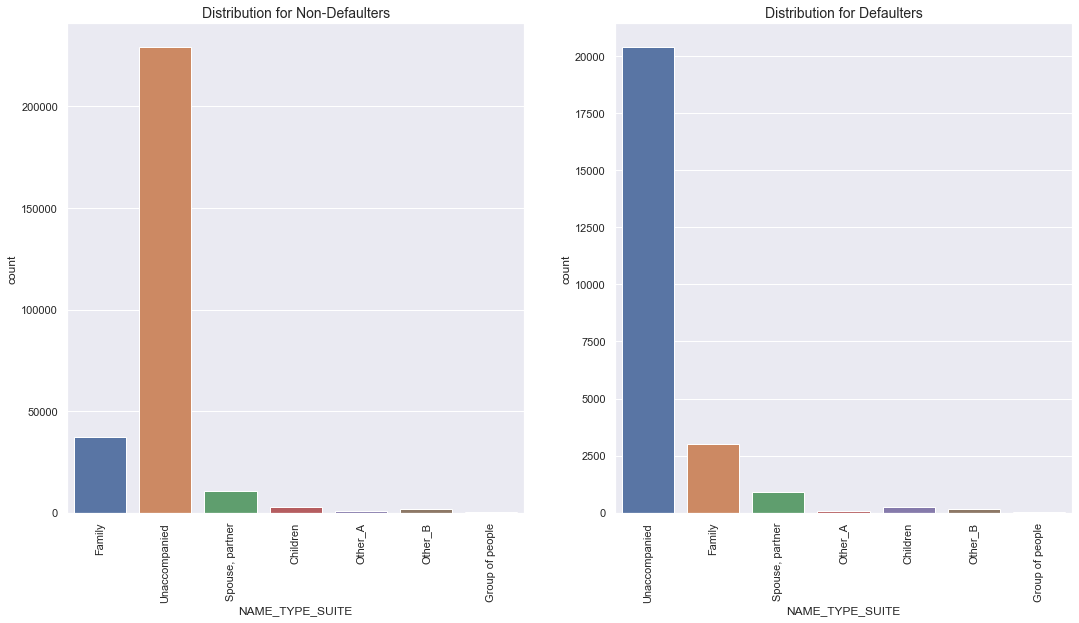

In [115]:
plotGraph('NAME_TYPE_SUITE')

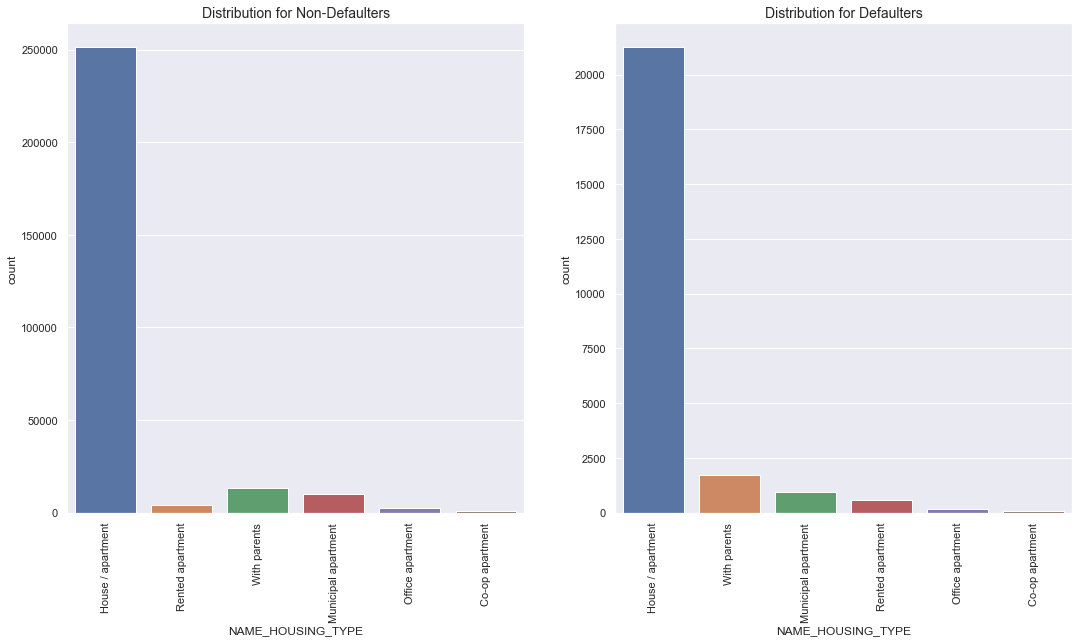

In [116]:
plotGraph('NAME_HOUSING_TYPE')

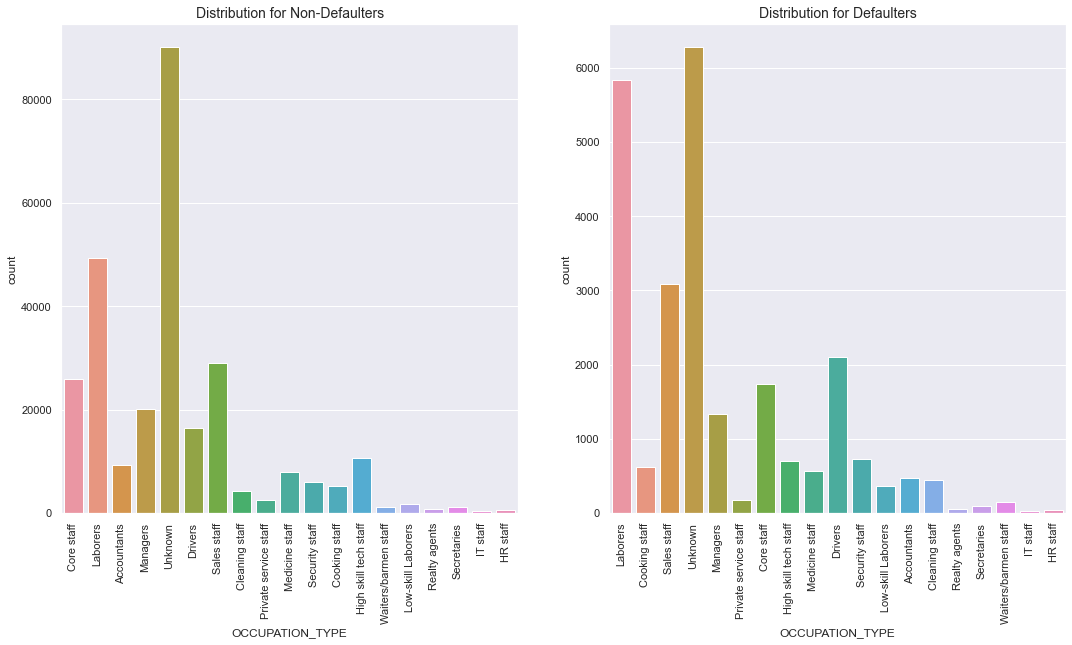

In [117]:
plotGraph('OCCUPATION_TYPE')

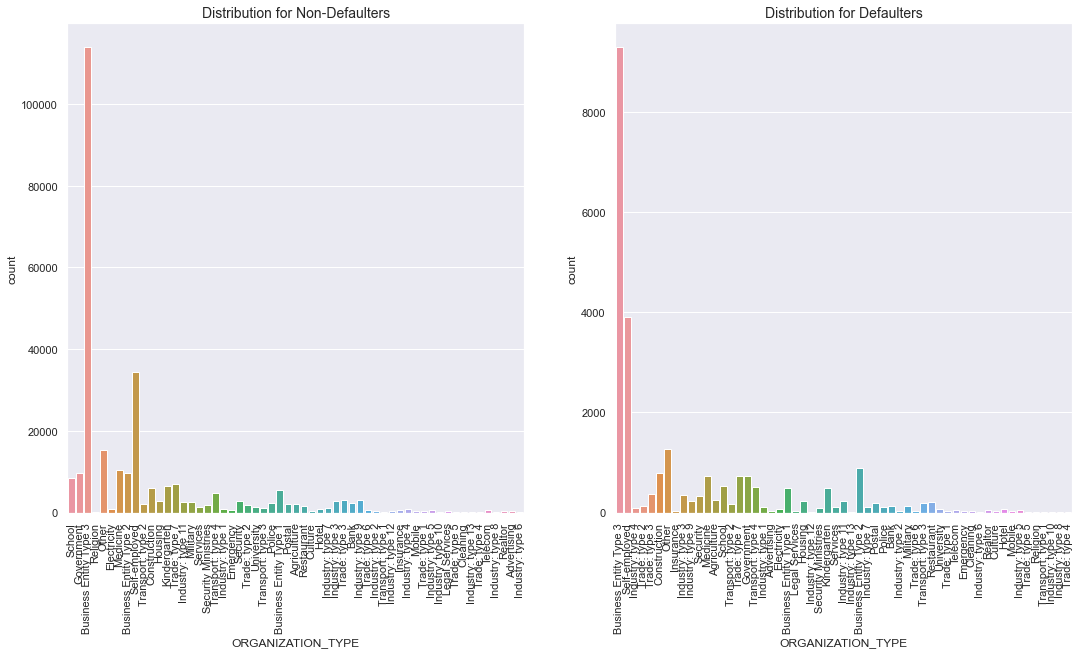

In [118]:
plotGraph('ORGANIZATION_TYPE')

#### Inferences that be taken out of univariate analysis

##### 1. People in the Age_Group "Young Adults" [20-39] have generally have a higher tendency of being a defaulter as compared to others.
##### 2. For most of the other categories the results of top category remains the same in DEFAULTERS & NON DEFAULTERS segments. Thus will need to perform further analysis

#### <font color = maroon> 2.9 Performing Segmented univariate anlysis on Target values </font>

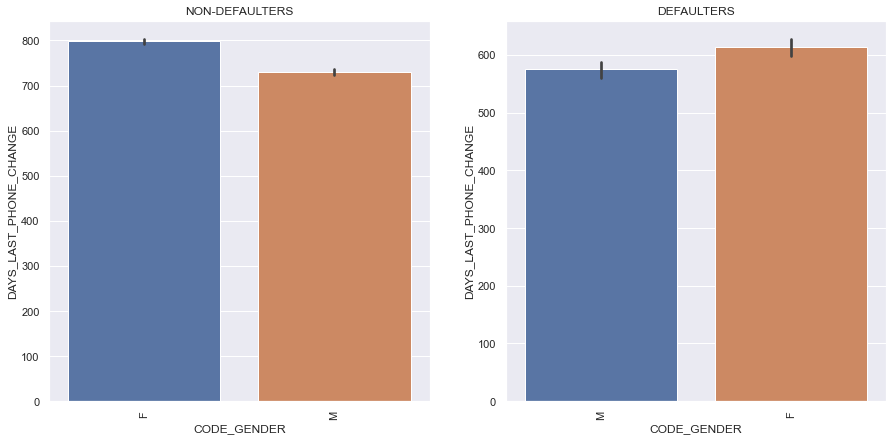

In [119]:
def segmented_univariate(x, y):
    plt.figure(figsize=(15, 7))
    # subplot 1: statistic=mean
    plt.subplot(1, 2, 1)
    plt.xticks(rotation=90)
    sns.barplot(x=x, y=y, data=appData_df_0, estimator =np.median)
    plt.title("NON-DEFAULTERS")
    # subplot 2: statistic=median
    plt.subplot(1, 2, 2)
    plt.xticks(rotation=90)
    sns.barplot(x=x, y=y, data=appData_df_1, estimator =np.median)
    plt.title("DEFAULTERS")
    plt.show()
    
segmented_univariate('CODE_GENDER', 'DAYS_LAST_PHONE_CHANGE')

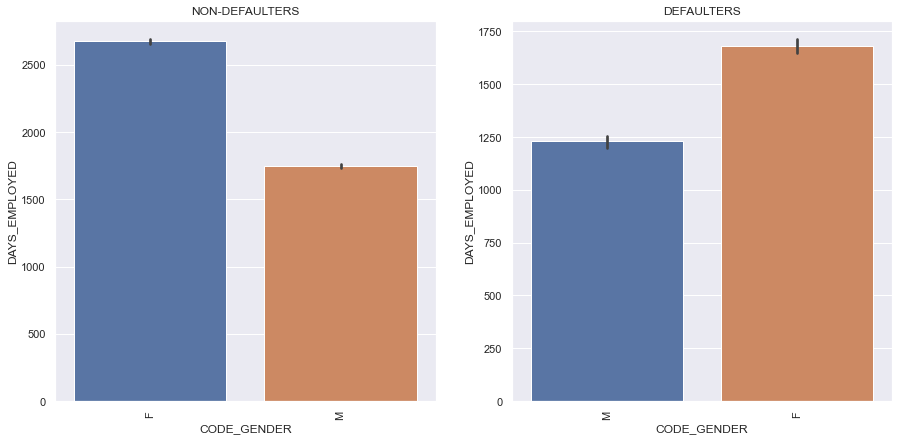

In [120]:
segmented_univariate('CODE_GENDER', 'DAYS_EMPLOYED')

##### 1. Usually it can be seen MALES have higher tendency than FEMALES for Phone_Changes in "Defaulters" distribution.
##### 2. Usually it can be seen MALES have higher tendency than FEMALES for Days Employed in "Defaulters" distribution could be because of Instability in the new job 

From above 2 analysis Females can be considered safe to be provided with loan


#### <font color = maroon> 2.10 Performing Bivariate and Multivariate Analysis </font>

##### <font color = maroon> 2.10.1 Numeric to Numeric Analysus for Non-Defaulters and Defaulters  </font>

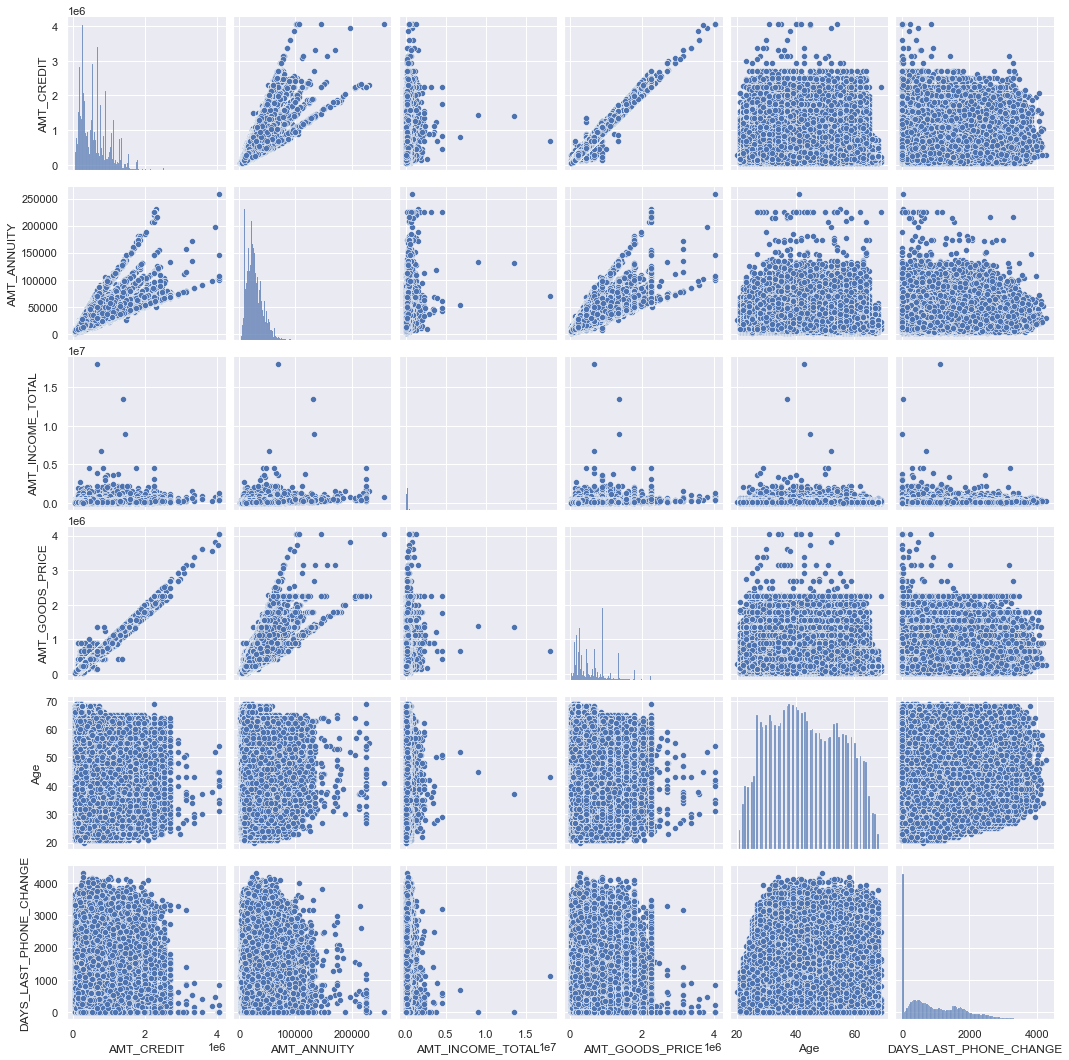

In [121]:
# plotting pair plots for NON-DEFAULTERS

pair = appData_df_0[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'Age', 'DAYS_LAST_PHONE_CHANGE']]
sns.pairplot(pair)

plt.show()

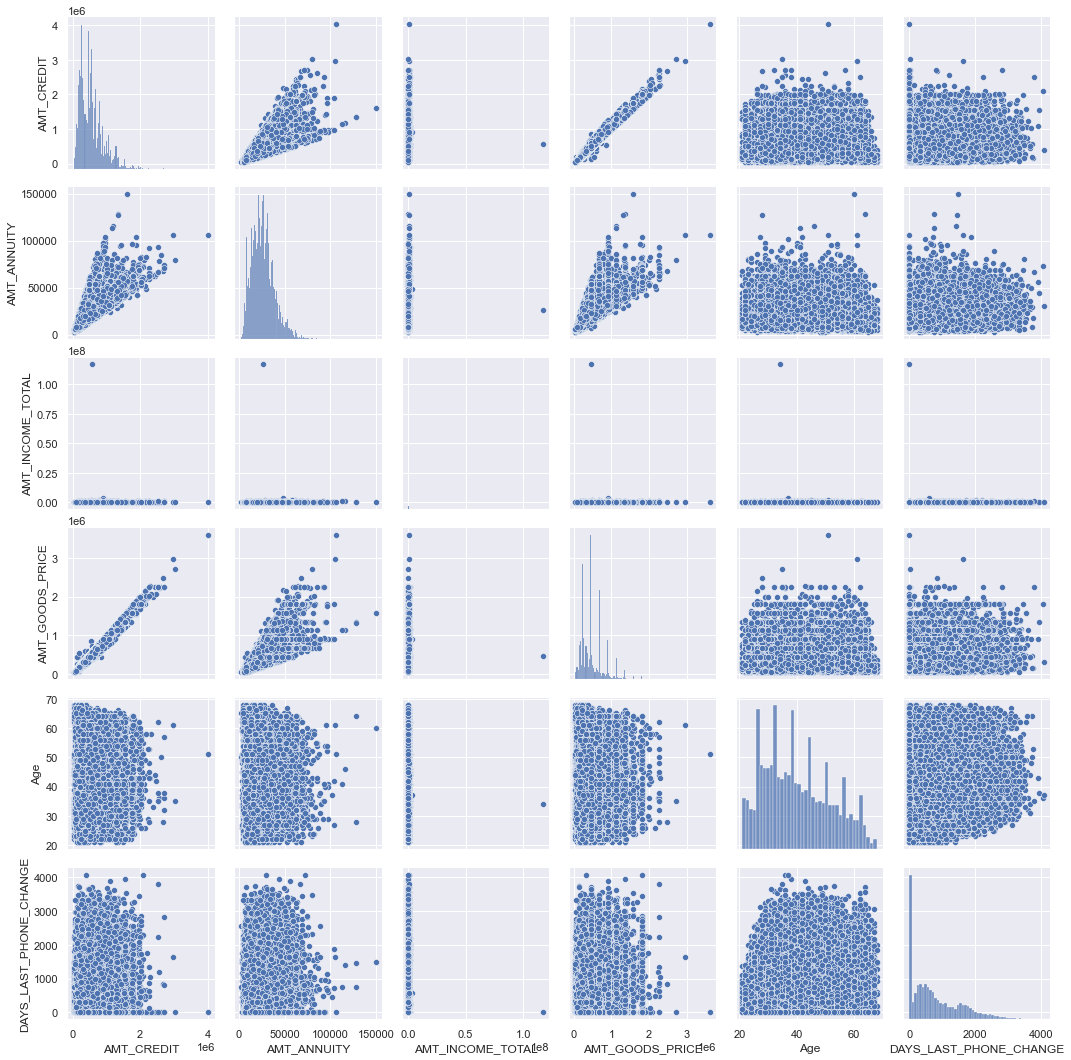

In [122]:
# plotting pair plots for DEFAULTERS
pair = appData_df_1[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'Age', 'DAYS_LAST_PHONE_CHANGE']]
sns.pairplot(pair)

plt.show()

In [123]:
# finding correlation in NON-DEFAULTERS dataset

corr_nonDefaulter = appData_df_0[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','Age',
         'AMT_CREDIT','CNT_FAM_MEMBERS', 'CNT_CHILDREN', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
              'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','REGION_RATING_CLIENT','REGION_POPULATION_RELATIVE',
              'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
              'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','LIVE_CITY_NOT_WORK_CITY']].corr(method = 'pearson')

unstacked_nonDefaulter = corr_nonDefaulter.unstack().drop_duplicates()

u_nD = unstacked_nonDefaulter.sort_values(kind="quicksort", ascending = False).head(50)

In [124]:
# printing top 10 correlation in non-Defaulter dataset
u_nD.iloc[1:11]

OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE       0.998508
AMT_GOODS_PRICE             AMT_CREDIT                     0.987022
REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY    0.950149
CNT_FAM_MEMBERS             CNT_CHILDREN                   0.878571
REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    0.861861
DEF_30_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE       0.859332
AMT_GOODS_PRICE             AMT_ANNUITY                    0.776421
AMT_ANNUITY                 AMT_CREDIT                     0.771297
DAYS_EMPLOYED               Age                            0.626028
REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION     0.446101
dtype: float64

In [125]:
# finding correlation in DEFAULTERS dataset

corr_Defaulter = appData_df_1[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','Age',
         'AMT_CREDIT','CNT_FAM_MEMBERS', 'CNT_CHILDREN', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
              'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','REGION_RATING_CLIENT','REGION_POPULATION_RELATIVE',
              'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
              'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','LIVE_CITY_NOT_WORK_CITY']].corr(method = 'pearson')


unstacked_Defaulter = corr_Defaulter.unstack().drop_duplicates()

u_D = unstacked_Defaulter.sort_values(kind="quicksort", ascending = False).head(50)

### Client with Payment difficulties

In [126]:
# printing top 10 correlation in Defaulter dataset
u_D.iloc[1:11]

OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE       0.998269
AMT_GOODS_PRICE             AMT_CREDIT                     0.982783
REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY    0.956637
CNT_FAM_MEMBERS             CNT_CHILDREN                   0.885484
DEF_30_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE       0.868994
REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    0.847885
AMT_GOODS_PRICE             AMT_ANNUITY                    0.752295
AMT_ANNUITY                 AMT_CREDIT                     0.752195
DAYS_EMPLOYED               Age                            0.582441
REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION     0.497937
dtype: float64

### Top 3 pairs
OBS_30_CNT_SOCIAL_CIRCLE & OBS_60_CNT_SOCIAL_CIRCLE  
AMT_GOODS_PRICE & AMT_CREDIT      
REGION_RATING_CLIENT & REGION_RATING_CLIENT_W_CITY    

In [127]:
# finding top 10 inverse correlation
u_ID = unstacked_Defaulter.sort_values(kind="quicksort", ascending = True).head(50)

In [128]:
u_ID.iloc[1:11]

REGION_RATING_CLIENT         REGION_POPULATION_RELATIVE    -0.443236
Age                          CNT_CHILDREN                  -0.259222
                             CNT_FAM_MEMBERS               -0.203403
DAYS_EMPLOYED                LIVE_CITY_NOT_WORK_CITY       -0.198484
                             CNT_CHILDREN                  -0.192864
                             CNT_FAM_MEMBERS               -0.186515
Age                          REG_CITY_NOT_LIVE_CITY        -0.161921
                             LIVE_CITY_NOT_WORK_CITY       -0.123556
REGION_RATING_CLIENT         LIVE_REGION_NOT_WORK_REGION   -0.117079
REGION_RATING_CLIENT_W_CITY  LIVE_REGION_NOT_WORK_REGION   -0.111948
dtype: float64

##### <font color = maroon> 2.10.2 Numeric to Categorical columna Analysus for Non-Defaulters and Defaulters  </font>

##### Client with Payment difficulties

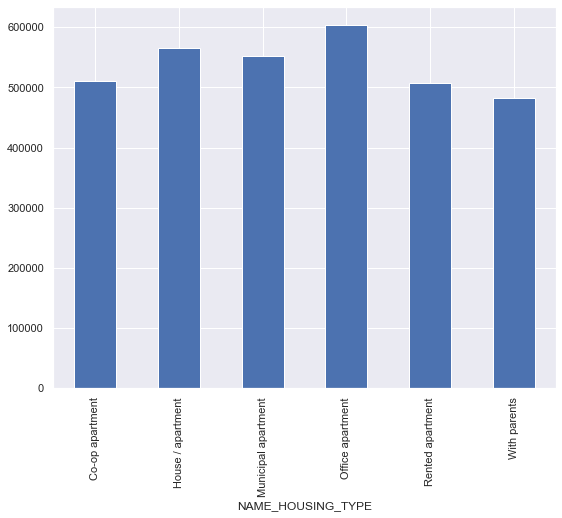

In [129]:
# Numeric value AMT_CREDIT comparison against Category "NAME_HOUSING_TYPE"

plt.figure(figsize=(9, 7))
appData_df_1.groupby("NAME_HOUSING_TYPE")["AMT_CREDIT"].mean().plot.bar()
plt.show()

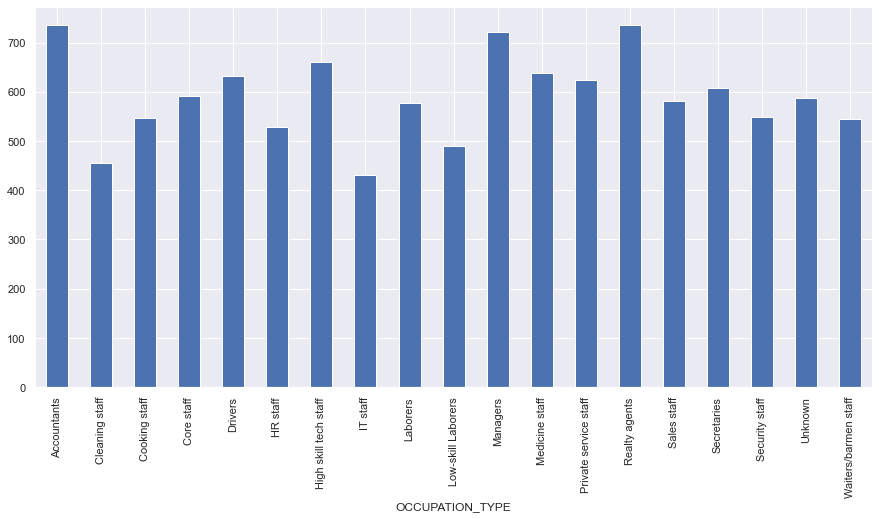

In [130]:
# Numeric value DAYS_LAST_PHONE_CHANGE comparison against Category "OCCUPATION_TYPE"


plt.figure(figsize=(15, 7))
appData_df_1.groupby("OCCUPATION_TYPE")["DAYS_LAST_PHONE_CHANGE"].median().plot.bar()
plt.show()

#### It can be seen IT staff & Cleaning Staff have higher tendency to change PHONE in recent days when being a defaulter.
#### Also Housing Type of people in Defaulter category is higher when they are in Office Appartments

### <font color = maroon> 3. Reading and cleaning the data from Previous Application</font>

In [132]:
prevApp_df.shape

(1670214, 37)

In [133]:
prevApp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [136]:
prevApp_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,8.806797e+02,3.139511e+02,1.605408e+01,342340.056543,15949.224065,35163.363265,78152.730207,83505.775017,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88413.495220,72007.270877,106405.950190,148833.342466,152484.418802,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,1.000000e+00,-1.000000e+00,0.000000e+00,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,2.800000e+02,-1.000000e+00,6.000000e+00,365243.000000,475.000000,257.000000,455.000000,447.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,921.000000,741.000000,1155.000000,1171.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,1.300000e+03,8.200000e+01,2.400000e+01,365243.000000,1825.000000,1735.000000,2418.000000,2501.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,2.922000e+03,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [135]:
# all negative values for DAY_* columns to be replaced with abs() values for easier analysis
column_list=[]
for i in prevApp_df.columns:
    if  i.startswith('DAYS_'):
        column_list.append(i)
        
        
prevApp_df[column_list]= abs(prevApp_df[column_list])

In [138]:
prevApp_df['NAME_SELLER_INDUSTRY'].value_counts()

XNA                     855720
Consumer electronics    398265
Connectivity            276029
Furniture                57849
Construction             29781
Clothing                 23949
Industry                 19194
Auto technology           4990
Jewelry                   2709
MLM partners              1215
Tourism                    513
Name: NAME_SELLER_INDUSTRY, dtype: int64

In [139]:
prevApp_df=prevApp_df.replace('XNA', np.NaN)
prevApp_df=prevApp_df.replace('XAP', np.NaN)

In [141]:
def checkDistributionsForPrev(param):
    plt.figure(figsize=(14, 10))
    plt.title('Distribution of Applicants in terms of their ' + param, fontsize=18)
    occType = prevApp_df[param].value_counts().sort_values(ascending=True)
    occType.plot(kind='barh', x= param, y = "Count" )
    plt.show()
    

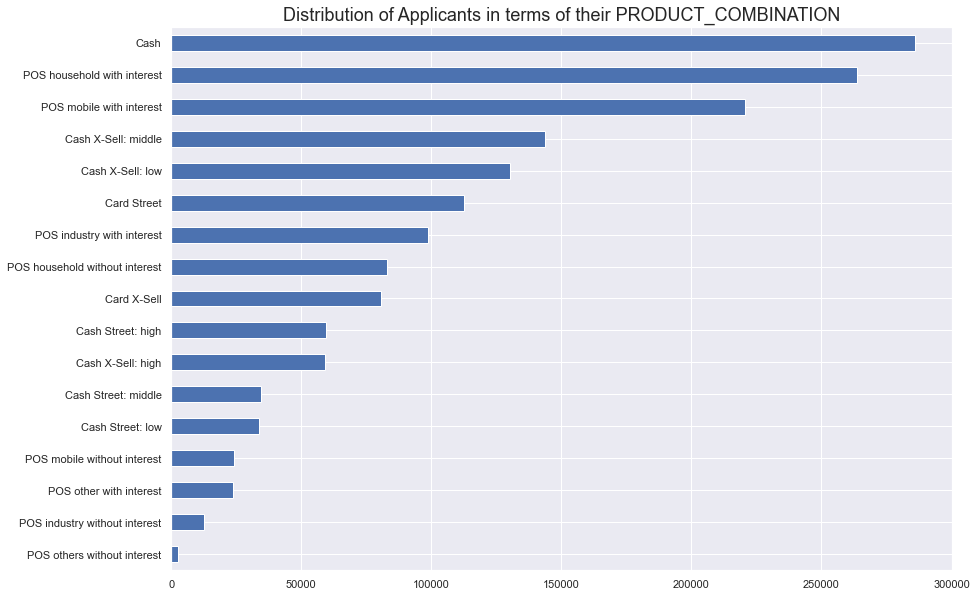

In [142]:
checkDistributionsForPrev('PRODUCT_COMBINATION')

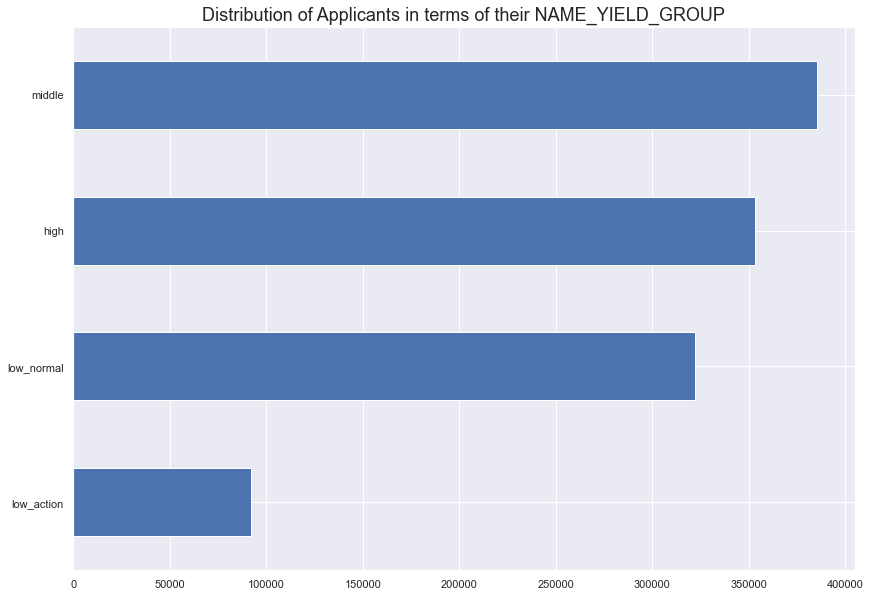

In [144]:
checkDistributionsForPrev('NAME_YIELD_GROUP')

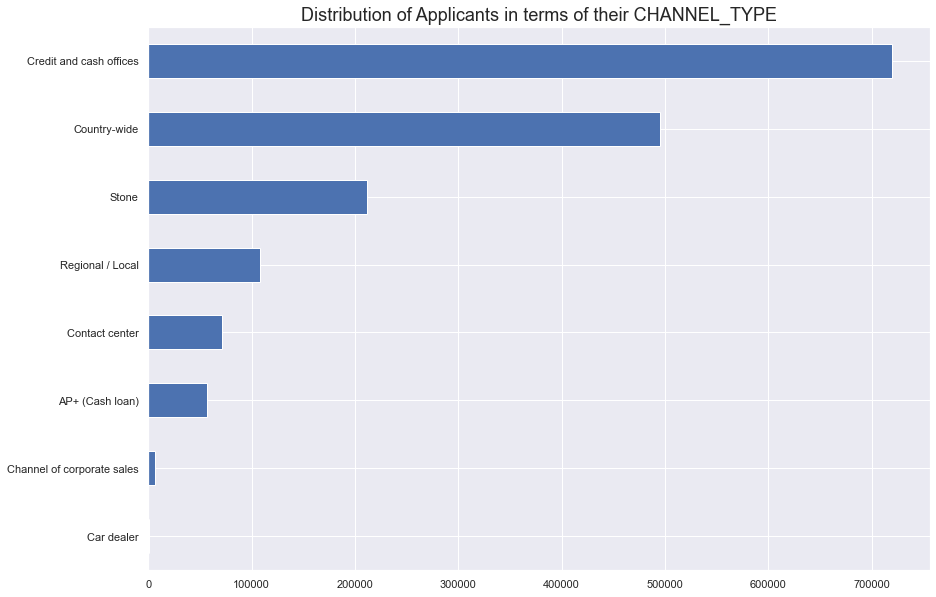

In [145]:
checkDistributionsForPrev('CHANNEL_TYPE')
 

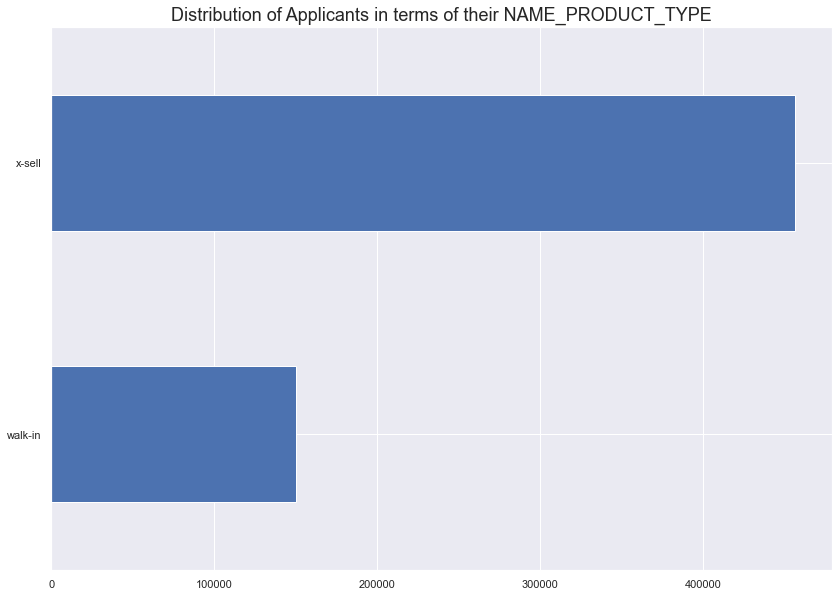

In [146]:
checkDistributionsForPrev('NAME_PRODUCT_TYPE')


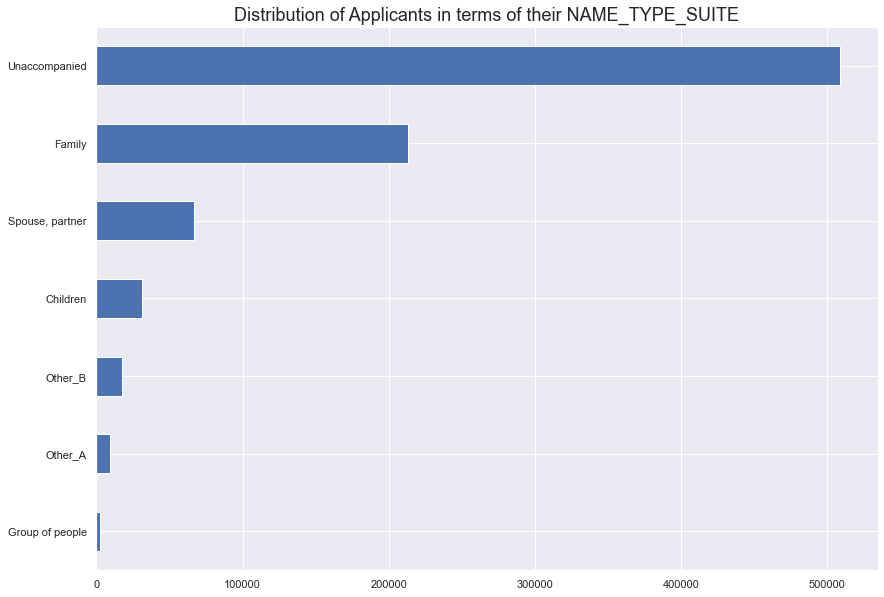

In [147]:
checkDistributionsForPrev('NAME_TYPE_SUITE')


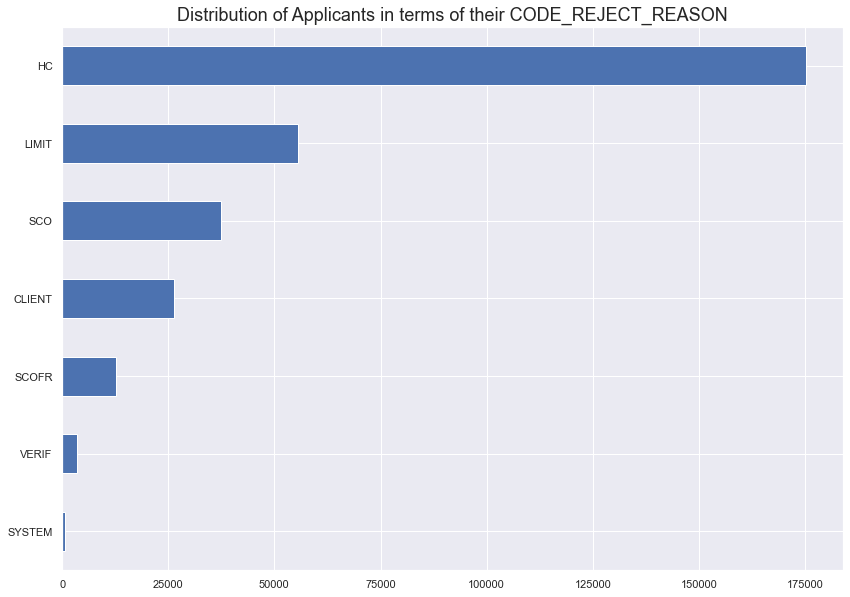

In [148]:

checkDistributionsForPrev('CODE_REJECT_REASON')

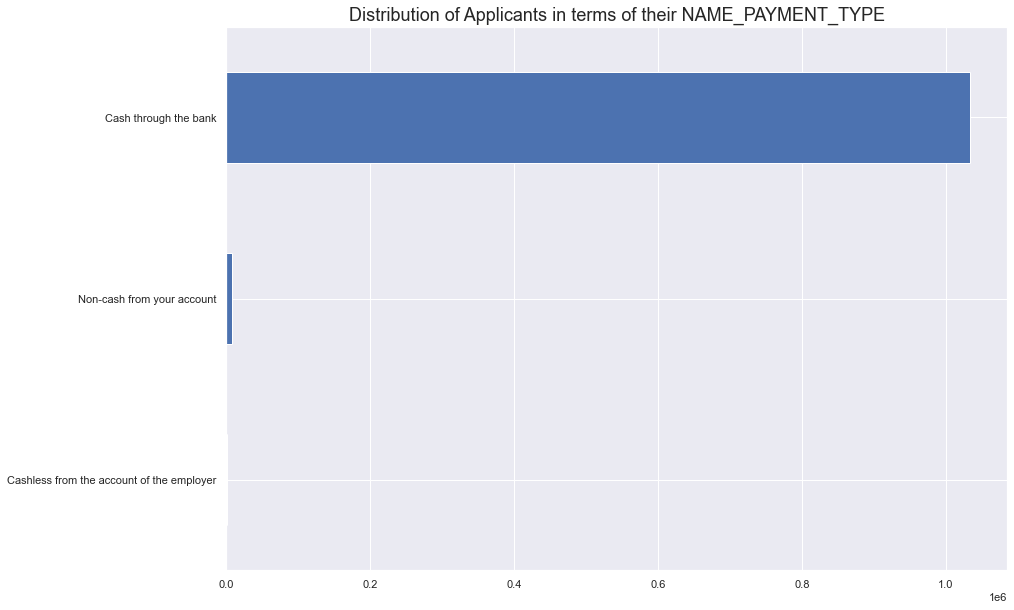

In [149]:

checkDistributionsForPrev('NAME_PAYMENT_TYPE')

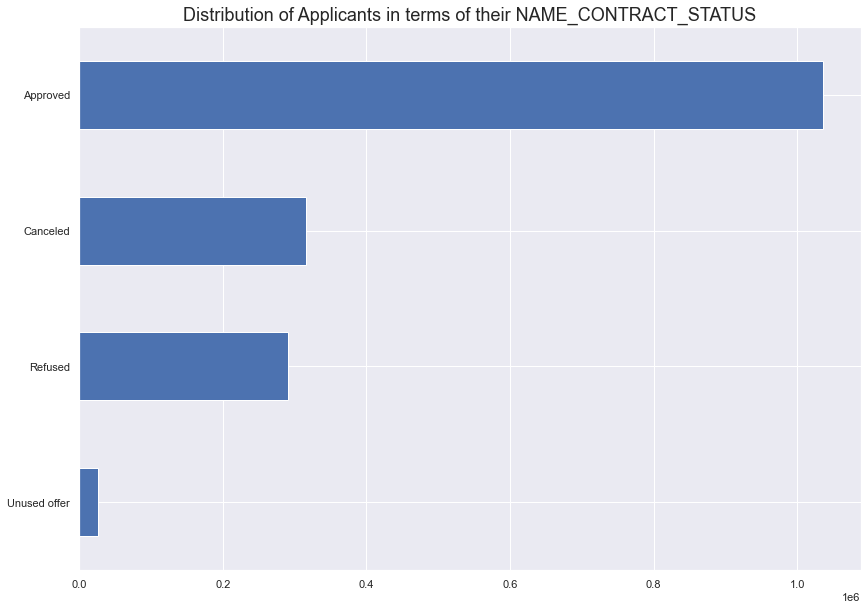

In [150]:


checkDistributionsForPrev('NAME_CONTRACT_STATUS')

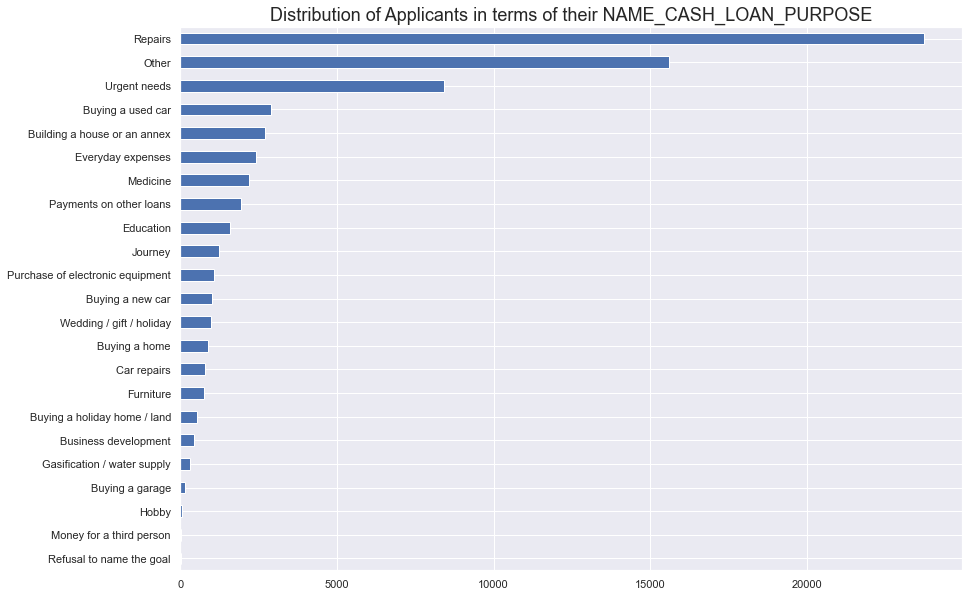

In [151]:


checkDistributionsForPrev('NAME_CASH_LOAN_PURPOSE')

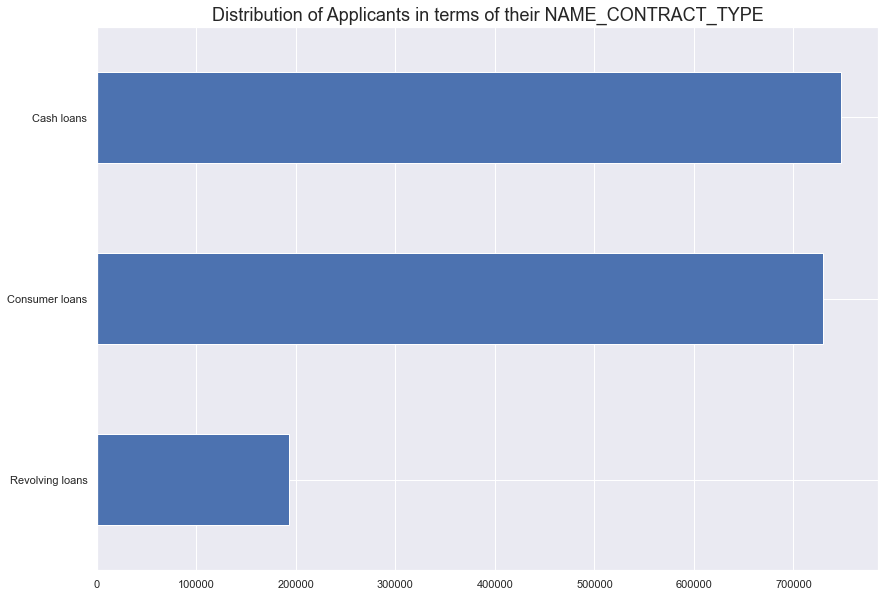

In [152]:

checkDistributionsForPrev('NAME_CONTRACT_TYPE')

In [154]:
appData_df_ForMerge=appData_df[['SK_ID_CURR','TARGET']]

In [158]:
mergedData = appData_df.merge(prevApp_df,on='SK_ID_CURR', how='inner')

In [161]:


mergedData.isnull().sum()



SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE_x              0
CODE_GENDER                       0
CNT_CHILDREN                      0
                              ...  
DAYS_FIRST_DUE               561106
DAYS_LAST_DUE_1ST_VERSION    561106
DAYS_LAST_DUE                561106
DAYS_TERMINATION             561106
NFLAG_INSURED_ON_APPROVAL    561106
Length: 76, dtype: int64

In [169]:
colWithHighNullValues = (mergedData.isnull().sum()/len(mergedData))
colWithHighNullValues = list(colWithHighNullValues[colWithHighNullValues.values>=0.3].index)
mergedData.drop(labels = colWithHighNullValues,axis =1,inplace=True) 

In [171]:
mergedData.shape

(1413701, 58)

In [172]:
mergedData.head(1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,...,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,Y,1,Approved,606.0,New,POS,Stone,500,24.0,POS other with interest


In [174]:
mergedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 58 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   SK_ID_CURR                    1413701 non-null  int64   
 1   TARGET                        1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x          1413701 non-null  object  
 3   CODE_GENDER                   1413701 non-null  object  
 4   CNT_CHILDREN                  1413701 non-null  int64   
 5   AMT_INCOME_TOTAL              1413701 non-null  float64 
 6   AMT_CREDIT_x                  1413701 non-null  float64 
 7   AMT_ANNUITY_x                 1413701 non-null  float64 
 8   AMT_GOODS_PRICE_x             1413701 non-null  float64 
 9   NAME_TYPE_SUITE_x             1413701 non-null  object  
 10  NAME_INCOME_TYPE              1413701 non-null  object  
 11  NAME_EDUCATION_TYPE           1413701 non-null  object  
 12  NAME_FAMILY_ST

In [176]:
# more inspection of defaulters based on their previous application

defaulter = mergedData[mergedData["TARGET"]==1]

In [177]:
defaulter.shape

(122360, 58)

<AxesSubplot:>

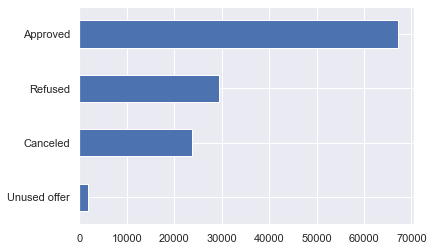

In [197]:
d = defaulter['NAME_CONTRACT_STATUS'].value_counts().sort_values(ascending=True)
d.plot(kind='barh', x= 'NAME_CONTRACT_STATUS', y = "Count" )

In [191]:
d = defaulter.groupby("NAME_CONTRACT_TYPE")['AMT_APPLICATION'].aggregate(['mean']).plot.bar()

KeyError: 'NAME_CONTRACT_TYPE'